# 信息的定量描述
直观理解： 
若消息发生的概率很大，受信者事先已经有所估计，则该消息的信息量就很小。 
若消息发生的概率很小，受信者感觉到很突然，该消息所含有的信息量就很大。 
所以信息量和概率联系在了一起，信息量可以表示为概率的函数。那么怎样的函数可以用来描述信息量呢？函数f(p)f(p)应该满足以下条件： 
1. f(p)应该是概率p的严格单调递减函数， 
2. 当p=1时，f(p)=0 
3. 当p=0时，f(p)=∞
4. 两个独立事件的联合信息量应该等于它们信息量之和。 
以下是f(p)=−log(p)f(p)=−log(p)的图像，满足以上的所有的要求。

# ID3算法熵计算公式

1. 选择分类\\(x_i\\)的概率

2. 信息期望值

自信息和熵的定义
若一个消息xx出现的概率为p，那么这个消息所含有的信息量为 
$$I=−log(p)$$

上式称为消息x的自信息，自信息有两种含义： 
1. 当该消息发生之前，表示发生该消息的不确定性， 
2. 当该消息发生之后，表示消息所含有的信息量。 
信源含有的信息量是信源发出的所有可能消息的平均不确定性，香农把信源所含有的信息量称为熵，是指每个符号所含有的信息量（自信息）的统计平均。若X是一个离散随机变量，概率分布为\\(p(x)=P(X=x)\\),\\(x∈X\\)，那么XX的熵为 
$$H(X)=\sum_{i}^{N}p(xi)I(xi)=−\sum_{i}^{N}p(xi)logp(xi)$$


$$H(X)=-\sum_{i=1}^{n}p(x_i)log_2p(x_i)$$


# 设计决策树
| 依水 | 鳍否 | 鱼否 |
| ---- | ---- | ---- |
| yes  | yes  | yes  |
| yes  | yes  | yes  |
| yes  | no  | no   |
| no  | yes  | no   |
| no  | no  | no   |

1. 从目的导向，先看最终决策项的信息熵 \\(H(X)\\)  --求先验熵，即求**鱼否**的信息熵。
$$H(鱼)=-\frac{2}{5}log_2\frac{2}{5}$$
$$H(非鱼)=-\frac{3}{5}log_2\frac{3}{5}$$
$$H(鱼判别)=H(鱼)+H(非鱼)$$

2. 已处于某条件类下的各项，--计算后验熵，即求条件中每项成立的各个熵
$$H(鱼否|鳍)=-\frac{2}{3}log_2\frac{2}{3}-\frac{1}{3}log_2\frac{1}{3}$$
$$H(鱼否|无鳍)=-\frac{0}{2}log_2\frac{0}{2}-\frac{2}{2}log_2\frac{2}{2}$$
$$H(鱼否|依水)=-\frac{2}{3}log_2\frac{2}{3}-\frac{1}{3}log_2\frac{1}{3}$$
$$H(鱼否|非水)=-\frac{0}{2}log_2\frac{0}{2}-\frac{2}{2}log_2\frac{2}{2}$$

3. 对给定\\(Y\\)成立的条件下，\\(X\\)集合求和后验熵即条件熵\\(H(X)\\)，即求 \\(H(鱼否|决策项)\\)，即条件熵=\\(p_i\\)*先验熵
$$H(鱼否|鳍否)=H(鱼否|鳍)+H(鱼否|无鳍)$$
$$H(鱼否|依水否)=H(鱼否|依水)+H(鱼否|非水)$$

4. 信息增益，对**每组判别项与是否结果**的关系
$$I(鱼否：鳍否)=H(鱼否)-H(鱼否|鳍否)$$
$$I(鱼否：依水否)=H(鱼否)-H(鱼否|依水否)$$

先计算先验熵，再计算后验熵，最后计算条件熵


按不确定性最小，信息量最大排在树根
即，信息增益\\(I\\)最大的作为树根


In [18]:
from math import log
def calcShannonEnt(dataSet): #这个数据集计算香农熵格式要求最后一列数据为判别标签作为H(Label)
  numEntries = len(dataSet) #数据集长度
  labelCounts = {}
  for featVec in dataSet: #对数据集内所有判别式初始化为0
    currentLabel = featVec[-1] #区每组数据尾部作为最终判别标签
    if currentLabel not in labelCounts.keys():
      labelCounts[currentLabel] = 0
    labelCounts[currentLabel] += 1
  shannonEnt = 0.0 #香农熵
  for key in labelCounts:#每个类标签出现概率之和，先验熵
    prob = float(labelCounts[key])/numEntries  #计算每个类标签的出现概率
    shannonEnt -= prob * log(prob,2) #后验熵 += 后验熵
  return shannonEnt #先验熵

In [19]:
def createDataSet():
  dataSet = [
    [1,1,'yes'],
    [1,1,'yes'],
    [1,0,'no'],
    [0,1,'no'],
    [0,1,'no']
  ]
  labels = ['no surfacing','flippers']
  return dataSet,labels

# 按照给定特征划分数据集

In [20]:
def splitDataSet(dataSet,index,value):#其实这个东西就是用作统计概率用的分数项
    retDataSet = []
    for featVec in dataSet: 
    # index列为value的数据集【该数据集需要排除index列】
    # 判断index列的值是否为value
        if featVec[index] == value:
        # chop out index used for splitting
        # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reducedFeatVec = featVec[:index]
            reducedFeatVec.extend(featVec[index+1:])
        # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
        # 收集结果值 index列为value的行【该行需要排除index列】
            retDataSet.append(reducedFeatVec)
    return retDataSet


In [21]:
myDat,labels = createDataSet()
print(myDat)
sn = calcShannonEnt(myDat)
print(sn)
x1 = splitDataSet(myDat,0,1)
x2 = splitDataSet(myDat,0,0)
x3 = splitDataSet(myDat,1,1)
x4 = splitDataSet(myDat,1,0)
print(x1,'\n',x2)
print(x3,'\n',x4)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
0.9709505944546686
[[1, 'yes'], [1, 'yes'], [0, 'no']] 
 [[1, 'no'], [1, 'no']]
[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']] 
 [[1, 'no']]


# 选择最好的数据集划分方式

In [22]:
def chooseBestFeatureToSplit(dataSet): #要求最后一列为数据为判别标签作为H(Label)
    numFeatures = len(dataSet[0]) - 1
    baseEntropy = calcShannonEnt(dataSet) #即得到H(结果)
    bestInfoGain, bestFeature = 0.0,-1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet] #判别项 列表值
        uniqueVals = set(featList) #取判别项唯一值
        newEntropy = 0.0
        for value in uniqueVals :#求信息增益
            subDataSet = splitDataSet(dataSet,i,value) #对每一列判别项，取每一组值分类
            prob = len(subDataSet)/float(len(dataSet)) #求每一组值发生概率
            newEntropy += prob * calcShannonEnt(subDataSet) #条件熵 +=条件熵
        infoGain = baseEntropy - newEntropy
        print('infoGain=',infoGain,'bestFeature=',i,baseEntropy,newEntropy)
        if (infoGain > bestInfoGain): #求信息增益最大项
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [23]:
def majorityCnt(classList): #返回类中最多项的次数
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
            classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

# 创建树

In [24]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len(dataSet[0]) == 1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat]) #用后销毁
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals: #每次树干的每个支
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet,bestFeat,value),subLabels)#每个支即每个新树干，新树干数据集取自最佳类
    return myTree
    

In [25]:
myTree = createTree(myDat,labels)

infoGain= 0.4199730940219749 bestFeature= 0 0.9709505944546686 0.5509775004326937
infoGain= 0.17095059445466854 bestFeature= 1 0.9709505944546686 0.8
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0


# Matplot作图

In [26]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-

'''
Created on Oct 14, 2010
Update on 2017-02-27
Decision Tree Source Code for Machine Learning in Action Ch. 3
Author: Peter Harrington/jiangzhonglian
'''
import matplotlib.pyplot as plt

# 定义文本框 和 箭头格式 【 sawtooth 波浪方框, round4 矩形方框 , fc表示字体颜色的深浅 0.1~0.9 依次变浅，没错是变浅】
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")


def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是否为dict, 不是+1
        if type(secondDict[key]) is dict:
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    # 根节点开始遍历
    for key in secondDict.keys():
        # 判断子节点是不是dict, 求分枝的深度
        # ----------写法1 start ---------------
        if type(secondDict[key]) is dict:
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        # ----------写法1 end ---------------

        # ----------写法2 start --------------
        # thisDepth = 1 + getTreeDepth(secondDict[key]) if type(secondDict[key]) is dict else 1
        # ----------写法2 end --------------
        # 记录最大的分支深度
        maxDepth = max(maxDepth, thisDepth)
    return maxDepth


def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction', xytext=centerPt, textcoords='axes fraction', va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)


def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0] - cntrPt[0]) / 2 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)


def plotTree(myTree, parentPt, nodeTxt):
    # 获取叶子节点的数量
    numLeafs = getNumLeafs(myTree)
    # 获取树的深度
    # depth = getTreeDepth(myTree)

    # 找出第1个中心点的位置，然后与 parentPt定点进行划线
    cntrPt = (plotTree.xOff + (1 + numLeafs) / 2 / plotTree.totalW, plotTree.yOff)
    # print(cntrPt)
    # 并打印输入对应的文字
    plotMidText(cntrPt, parentPt, nodeTxt)

    firstStr = list(myTree.keys())[0]
    # 可视化Node分支点
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    # 根节点的值
    secondDict = myTree[firstStr]
    # y值 = 最高点-层数的高度[第二个节点位置]
    plotTree.yOff = plotTree.yOff - 1 / plotTree.totalD
    for key in secondDict.keys():
        # 判断该节点是否是Node节点
        if type(secondDict[key]) is dict:
            # 如果是就递归调用[recursion]
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            # 如果不是，就在原来节点一半的地方找到节点的坐标
            plotTree.xOff = plotTree.xOff + 1 / plotTree.totalW
            # 可视化该节点位置
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            # 并打印输入对应的文字
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1 / plotTree.totalD


def createPlot(inTree):
    # 创建一个figure的模版
    fig = plt.figure(1, facecolor='green')
    fig.clf()

    axprops = dict(xticks=[], yticks=[])
    # 表示创建一个1行，1列的图，createPlot.ax1 为第 1 个子图，
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)

    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    # 半个节点的长度
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5, 1.0), '')
    plt.show()


# # 测试画图
# def createPlot():
#     fig = plt.figure(1, facecolor='white')
#     fig.clf()
#     # ticks for demo puropses
#     createPlot.ax1 = plt.subplot(111, frameon=False)
#     plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
#     plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
#     plt.show()


# 测试数据集
def retrieveTree(i):
    listOfTrees = [
        {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
        {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
    ]
    return listOfTrees[i]


# myTree = retrieveTree(1)
# createPlot(myTree)

# 使用决策树预测隐形眼镜类型
lenses.txt 透镜组数据
age prescript astigmatic tearRate

In [27]:
fr = open('lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]
lensesLabels = ['age','prescript', 'astigmatic', 'tearRate']
lensesTree = createTree(lenses,lensesLabels)
lensesTree

infoGain= 0.03939650364612124 bestFeature= 0 1.3260875253642983 1.286691021718177
infoGain= 0.039510835423565815 bestFeature= 1 1.3260875253642983 1.2865766899407325
infoGain= 0.37700523001147723 bestFeature= 2 1.3260875253642983 0.9490822953528211
infoGain= 0.5487949406953986 bestFeature= 3 1.3260875253642983 0.7772925846688997
infoGain= 0.22125183600446618 bestFeature= 0 1.5545851693377994 1.3333333333333333
infoGain= 0.09543725231055489 bestFeature= 1 1.5545851693377994 1.4591479170272446
infoGain= 0.7704260414863776 bestFeature= 2 1.5545851693377994 0.7841591278514218
infoGain= 0.2516291673878229 bestFeature= 0 0.9182958340544896 0.6666666666666666
infoGain= 0.4591479170272448 bestFeature= 1 0.9182958340544896 0.4591479170272448
infoGain= 0.9182958340544896 bestFeature= 0 0.9182958340544896 0.0
infoGain= 0.3166890883150208 bestFeature= 0 0.6500224216483541 0.3333333333333333
infoGain= 0.19087450462110933 bestFeature= 1 0.6500224216483541 0.4591479170272448
infoGain= 1.0 bestFeature

{'tearRate': {'reduced': 'no lenses',
  'normal': {'astigmatic': {'yes': {'prescript': {'myope': 'hard',
      'hyper': {'age': {'presbyopic': 'no lenses',
        'pre': 'no lenses',
        'young': 'hard'}}}},
    'no': {'age': {'presbyopic': {'prescript': {'myope': 'no lenses',
        'hyper': 'soft'}},
      'pre': 'soft',
      'young': 'soft'}}}}}}

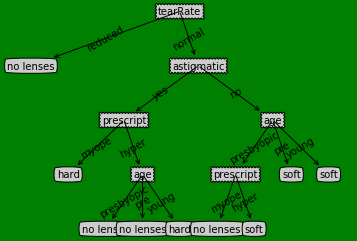

In [28]:
createPlot(lensesTree)